# AS - TME3
----
2018-2019

BINOME : Juliette ORTHOLAND, Stieban FERNANDEZ

#### Librairies et modules utiles

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from neural_network import NeuralNetwork
from module import *
from loss import *

## Régression linéaire

### Jeu de données : Boston Housing
Chargement des données

In [2]:
with open("../data/housing.data", "r") as f:
    data = pd.read_csv(f, delimiter="\s+", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
# Shuffle
data_np = np.array(data)
np.random.shuffle(data_np)

# Setting X and Y
X = torch.from_numpy(data_np[:,:-1])
y = torch.from_numpy(data_np[:,-1]).reshape(-1,1)

# Split
X_train, X_test = X[:int(len(X)*0.7)].float(), X[int(len(X)*0.7):].float()
y_train, y_test = y[:int(len(y)*0.7)].float(), y[int(len(y)*0.7):].float()

# Normalization
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

mse = MSE()

eps1 = 1e-9

Test

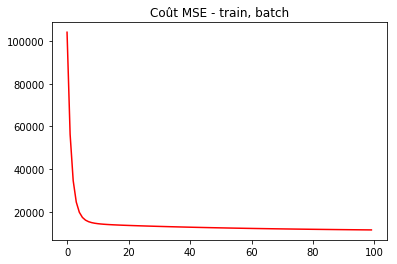

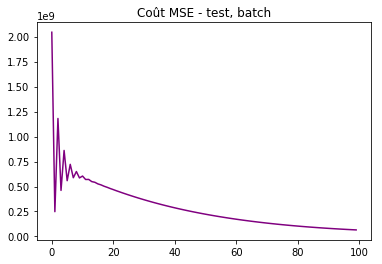

In [5]:
nn = NeuralNetwork(loss=MSE())
nn.add_layer( ModuleLinear(X_train.shape[1], 1) )
costs, costs_test = nn.fit_and_test(X_train, y_train, X_test, y_test, epsilon=4e-4)

plt.title("Coût MSE - train, batch")
plt.plot(range(len(costs)), costs, c="red")
plt.show()

plt.title("Coût MSE - test, batch")
plt.plot(range(len(costs_test)), costs_test, c="purple")
plt.show()

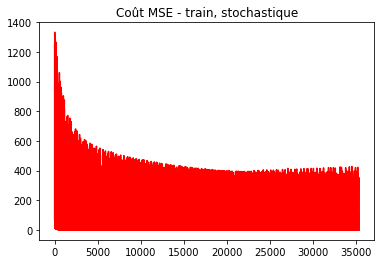

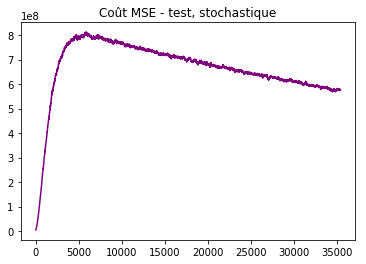

In [6]:
nn = NeuralNetwork(loss=MSE())
nn.add_layer( ModuleLinear(X_train.shape[1], 1) )
costs, costs_test = nn.fit_and_test(X_train, y_train, X_test, y_test, epsilon=7e-5, mode="stoch")

plt.title("Coût MSE - train, stochastique")
plt.plot(range(len(costs)), costs, c="red")
plt.show()

plt.title("Coût MSE - test, stochastique")
plt.plot(range(len(costs_test)), costs_test, c="purple")
plt.show()

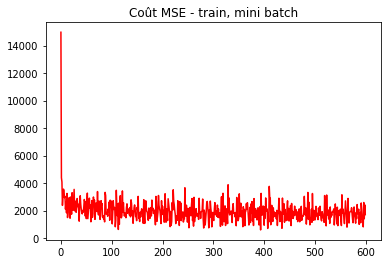

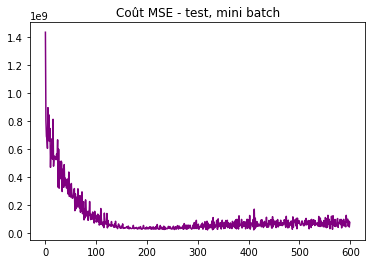

In [7]:
nn = NeuralNetwork(loss=MSE())
nn.add_layer( ModuleLinear(X_train.shape[1], 1) )
costs, costs_test = nn.fit_and_test(X_train, y_train, X_test, y_test, epsilon=2e-3, mode="mini_batch")

plt.title("Coût MSE - train, mini batch")
plt.plot(range(len(costs)), costs, c="red")
plt.show()

plt.title("Coût MSE - test, mini batch")
plt.plot(range(len(costs_test)), costs_test, c="purple")
plt.show()

----
## Classification

### Jeu de données : MNIST

In [6]:
## une fois le dataset telecharge, mettre download=False !
## Pour le test, train = False
## transform permet de faire un preprocessing des donnees (ici ?)
batch_size=600
nb_digits=10
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=batch_size, shuffle=True) 

y_onehot = torch.FloatTensor(batch_size, nb_digits) 

for i,(data,target) in enumerate(train_loader):
    #print(i,data.size(),data.type(),target.size(),target.type())
    # do something...
    X = data.view(batch_size, -1)
    ## Encoding des labels en onehot
    y_onehot.zero_()
    y_onehot.scatter_(1, target.view(-1,1), 1)
    break


In [7]:
X, y_onehot

(tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]),
 tensor([[0., 0., 0.,  ..., 0., 1., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [8]:
from sklearn.metrics import f1_score

def one_vs_one(X, y, c1, c2, test_size=0.3):
    X = torch.cat((X[y[:,c1] == 1], X[y[:,c2] == 1]))
    y = torch.cat((y[y[:,c1] == 1][:,[c1,c2]], y[y[:,c2] == 1][:,[c1,c2]]))
    inds = list(range(len(X)))
    np.random.shuffle(inds)
    sep = int(test_size * len(X))
    return X[inds][:sep], X[inds][sep:], y[inds][:sep], y[inds][sep:]

def split_train_test(X, y, test_size=0.3):
    inds = list(range(len(X)))
    np.random.shuffle(inds)
    sep = int(test_size * len(X))
    return X[inds][:sep], X[inds][sep:], y[inds][:sep], y[inds][sep:]


### Perceptron - Binaire

Batch

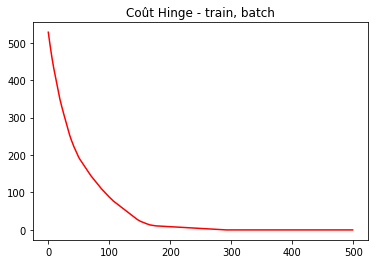

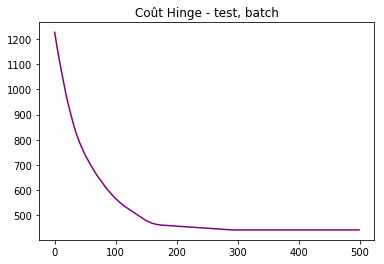

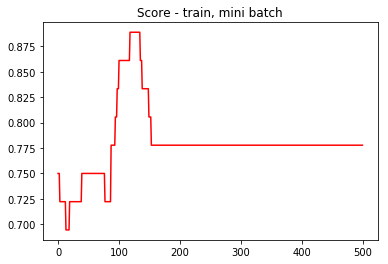

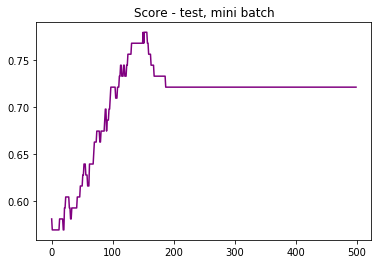

In [10]:
X_train, X_test, y_train, y_test = one_vs_one(X, y_onehot, 3, 5)

nn = NeuralNetwork(loss=Hinge())
nn.add_layer( ModuleLinear(len(X[0]), 2) )
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, y_test, mode="batch", epsilon=2e-4)

plt.title("Coût Hinge - train, batch")
plt.plot(range(len(costs)), costs, c="red")
plt.show()

plt.title("Coût Hinge - test, batch")
plt.plot(range(len(costs_test)), costs_test, c="purple")
plt.show()

plt.title("Score - train, mini batch")
plt.plot(range(len(scores)), scores, c="red")
plt.show()

plt.title("Score - test, mini batch")
plt.plot(range(len(scores_test)), scores_test, c="purple")
plt.show()

Stochastique

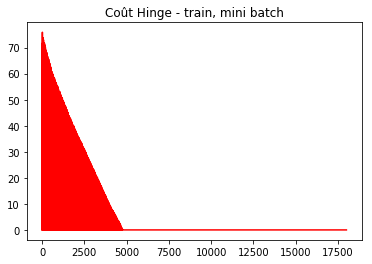

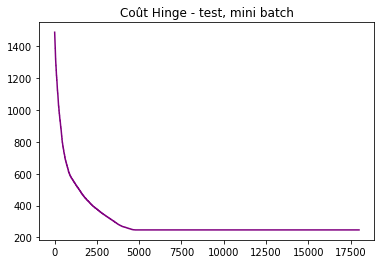

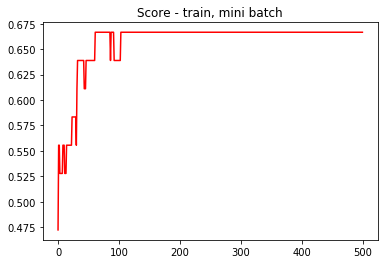

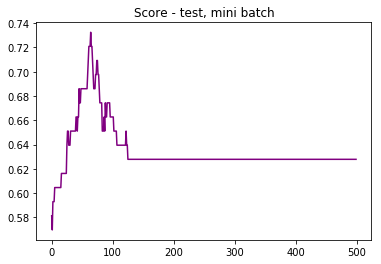

In [14]:
nn = NeuralNetwork(loss=Hinge())
nn.add_layer( ModuleLinear(len(X[0]), 2) )
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, 
                                                       X_test, y_test, 
                                                       mode="stoch", 
                                                       epsilon = 1e-3)

plt.title("Coût Hinge - train, mini batch")
plt.plot(range(len(costs)), costs, c="red")
plt.show()

plt.title("Coût Hinge - test, mini batch")
plt.plot(range(len(costs_test)), costs_test, c="purple")
plt.show()

plt.title("Score - train, mini batch")
plt.plot(range(len(scores)), scores, c="red")
plt.show()

plt.title("Score - test, mini batch")
plt.plot(range(len(scores_test)), scores_test, c="purple")
plt.show()

mini_batch

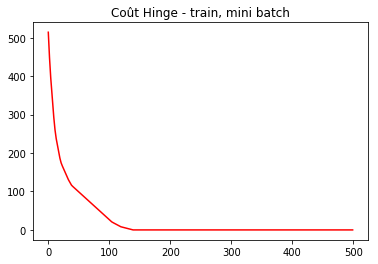

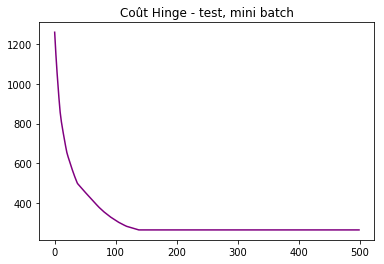

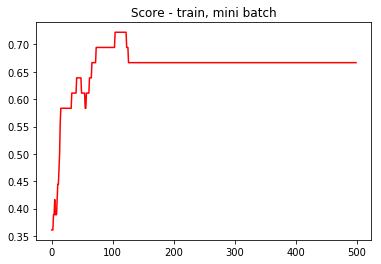

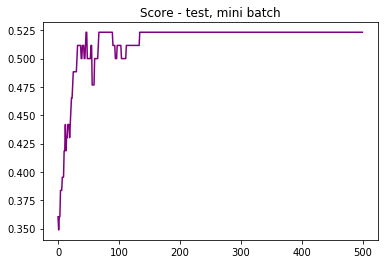

In [13]:
X_train, X_test, y_train, y_test = one_vs_one(X, y_onehot, 3, 5)

nn = NeuralNetwork(loss=Hinge())
nn.add_layer( ModuleLinear(len(X[0]), 2) )
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, y_test, mode="mini_batch", epsilon = 1e-3)

plt.title("Coût Hinge - train, mini batch")
plt.plot(range(len(costs)), costs, c="red")
plt.show()

plt.title("Coût Hinge - test, mini batch")
plt.plot(range(len(costs_test)), costs_test, c="purple")
plt.show()

plt.title("Score - train, mini batch")
plt.plot(range(len(scores)), scores, c="red")
plt.show()

plt.title("Score - test, mini batch")
plt.plot(range(len(scores_test)), scores_test, c="purple")
plt.show()

### Perceptron - Multiclasse

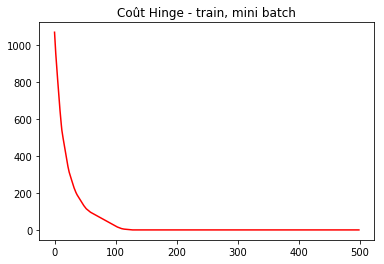

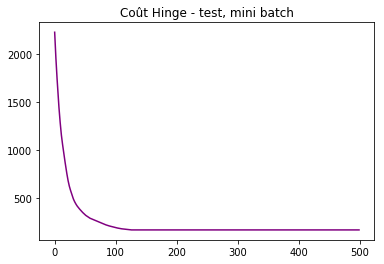

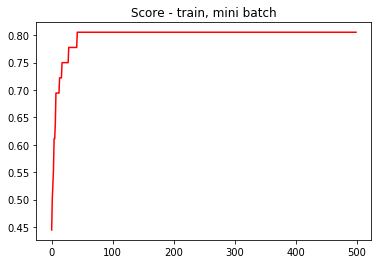

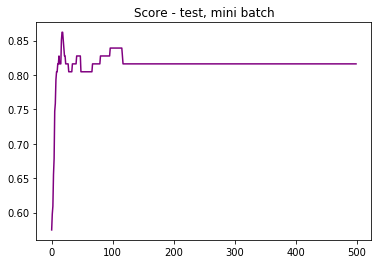

In [18]:
nn = NeuralNetwork(loss=Hinge())
nn.add_layer( ModuleLinear(len(X[0]), 2) )
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, 
                                                       X_test, y_test, 
                                                       mode="mini_batch",
                                                      epsilon = 1e-3)

plt.title("Coût Hinge - train, mini batch")
plt.plot(range(len(costs)), costs, c="red")
plt.show()

plt.title("Coût Hinge - test, mini batch")
plt.plot(range(len(costs_test)), costs_test, c="purple")
plt.show()

plt.title("Score - train, mini batch")
plt.plot(range(len(scores)), scores, c="red")
plt.show()

plt.title("Score - test, mini batch")
plt.plot(range(len(scores_test)), scores_test, c="purple")
plt.show()

### Régression logistique

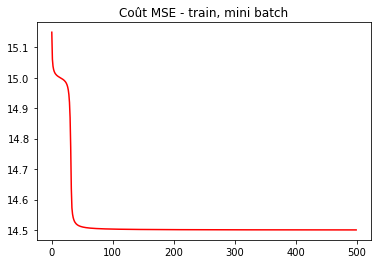

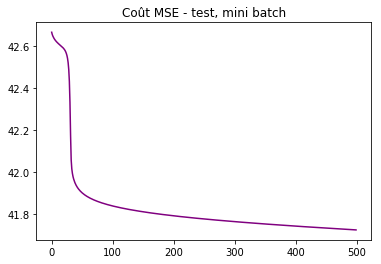

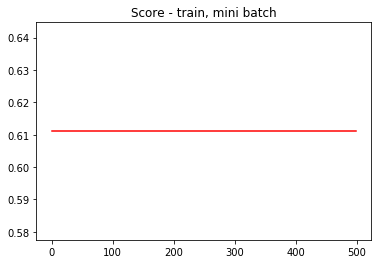

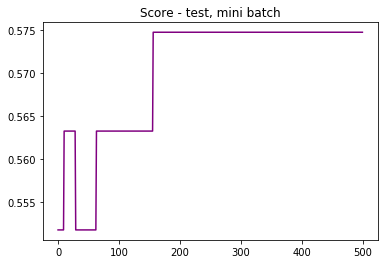

In [19]:
X_train, X_test, y_train, y_test = one_vs_one(X, y_onehot, 5, 7)

nn = NeuralNetwork(loss=MSE())
nn.add_layer( [ModuleLinear(len(X[0]), 2), Activation(sigmoid, sigmoid_g)])
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test,
                                                       y_test, mode="mini_batch")

plt.title("Coût MSE - train, mini batch")
plt.plot(range(len(costs)), costs, c="red")
plt.show()

plt.title("Coût MSE - test, mini batch")
plt.plot(range(len(costs_test)), costs_test, c="purple")
plt.show()

plt.title("Score - train, mini batch")
plt.plot(range(len(scores)), scores, c="red")
plt.show()

plt.title("Score - test, mini batch")
plt.plot(range(len(scores_test)), scores_test, c="purple")
plt.show()

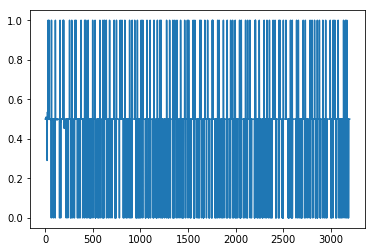

In [25]:
nn = NeuralNetwork(loss=MSE())
nn.add_layer( [ModuleLinear(len(X[0]), 2), Activation(sigmoid, sigmoid_g)] )
costs = nn.fit(X_train, y_train, mode='stoch', epsilon=1e-1)

plt.plot(range(len(costs)), costs)
plt.show()

----

### Réseau de neurones

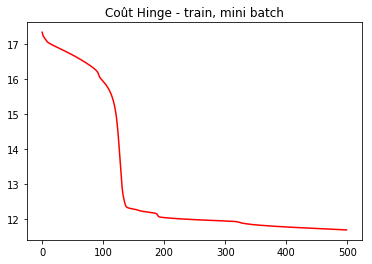

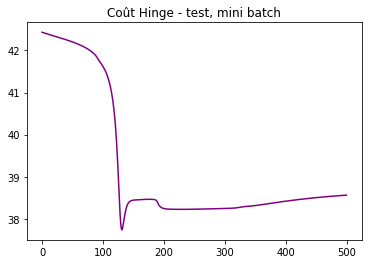

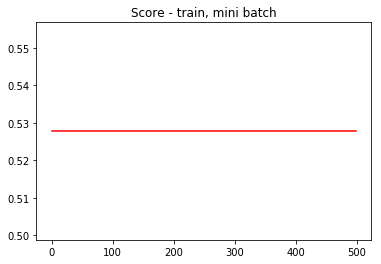

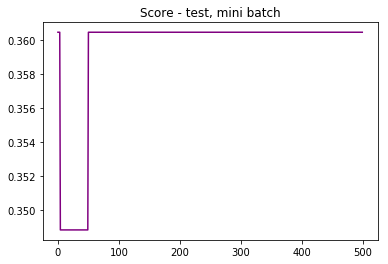

In [20]:
X_train, X_test, y_train, y_test = one_vs_one(X, y_onehot, 3, 5)

nn = NeuralNetwork(loss=MSE())

model1 = ModuleLinear(len(X[0]), 15)
activ1 = Activation(tanh, tanh_g)
model2 = ModuleLinear(15, len(y_test[0]))
activ2 = Activation(sigmoid, sigmoid_g)

nn.add_layer([model1, activ1, model2, activ2])
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, y_test, mode="mini_batch")

plt.title("Coût Hinge - train, mini batch")
plt.plot(range(len(costs)), costs, c="red")
plt.show()

plt.title("Coût Hinge - test, mini batch")
plt.plot(range(len(costs_test)), costs_test, c="purple")
plt.show()

plt.title("Score - train, mini batch")
plt.plot(range(len(scores)), scores, c="red")
plt.show()

plt.title("Score - test, mini batch")
plt.plot(range(len(scores_test)), scores_test, c="purple")
plt.show()

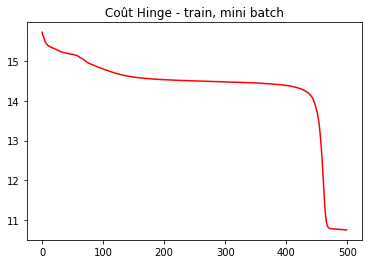

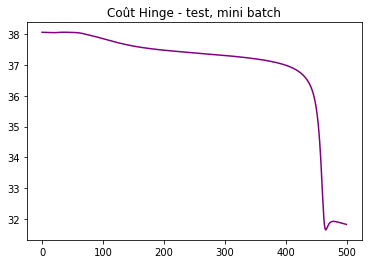

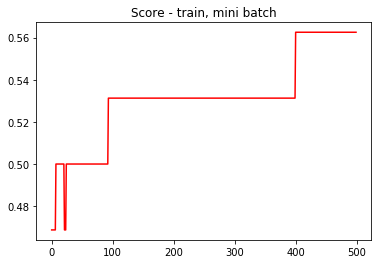

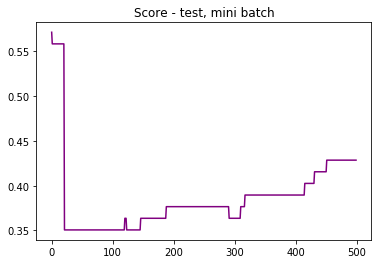

In [21]:
X_train, X_test, y_train, y_test = one_vs_one(X, y_onehot, 0, 8)

nn = NeuralNetwork(loss=MSE())

model1 = ModuleLinear(len(X[0]), 15)
activ1 = Activation(tanh, tanh_g)
model2 = ModuleLinear(15, 2)
activ2 = Activation(sigmoid, sigmoid_g)

nn.add_layer([model1, activ1, model2, activ2])
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, y_test, mode="mini_batch")

plt.title("Coût Hinge - train, mini batch")
plt.plot(range(len(costs)), costs, c="red")
plt.show()

plt.title("Coût Hinge - test, mini batch")
plt.plot(range(len(costs_test)), costs_test, c="purple")
plt.show()

plt.title("Score - train, mini batch")
plt.plot(range(len(scores)), scores, c="red")
plt.show()

plt.title("Score - test, mini batch")
plt.plot(range(len(scores_test)), scores_test, c="purple")
plt.show()

Avec SoftMax + CrossEntropy

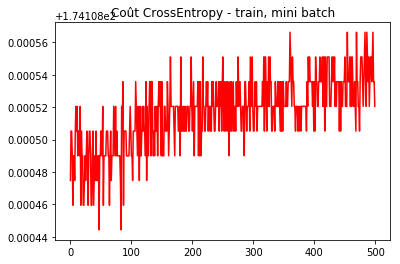

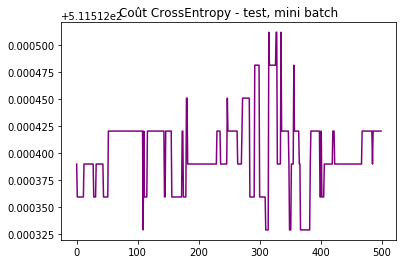

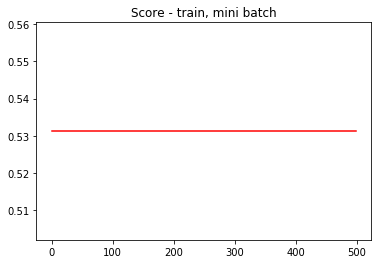

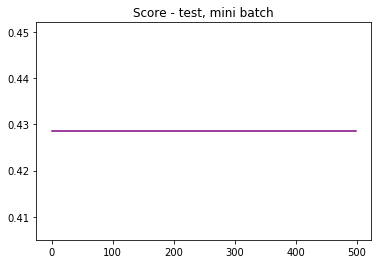

In [22]:
X_train, X_test, y_train, y_test = one_vs_one(X, y_onehot, 0, 8)

nn = NeuralNetwork(loss=CrossEntropy())

model1 = ModuleLinear(len(X[0]), 15)
activ1 = Activation(sigmoid, sigmoid_g)
model2 = ModuleLinear(15, 2)
activ2 = Activation(softmax2, softmax_g)

nn.add_layer([model1, activ1, model2, activ2])
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, y_test, mode="mini_batch", epsilon=1e-9)

plt.title("Coût CrossEntropy - train, mini batch")
plt.plot(range(len(costs)), costs, c="red")
plt.show()

plt.title("Coût CrossEntropy - test, mini batch")
plt.plot(range(len(costs_test)), costs_test, c="purple")
plt.show()

plt.title("Score - train, mini batch")
plt.plot(range(len(scores)), scores, c="red")
plt.show()

plt.title("Score - test, mini batch")
plt.plot(range(len(scores_test)), scores_test, c="purple")
plt.show()

----